# Basic usage of ABCD database

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from abcd import ABCD

First of all, we need to define the url of the database. It could be local or remote:

- direct access: url = 'mongodb://localhost:27017'
- api access: url = 'http://localhost/api'

using with statement to catch the riased exceptions. You may can ignore them  but in that case need to handle all the unexpected events. (cannot connect to db, lost connection, wrong filter, wrong url, etc. )

In [4]:
url = 'mongodb://localhost:27017'
# url = 'http://localhost:5000/api'
abcd =  ABCD(url)

print(abcd)
abcd

MongoDatabase(url=localhost:27017, db=abcd, collection=atoms)


MongoDatabase(url=localhost:27017, db=abcd, collection=atoms)

In [23]:
abcd.print_info()

================== ABCD MongoDB ==================
      type: mongodb
      host: localhost
      port: 27017
        db: abcd
collection: atoms
number of confs: 14


## Cleanup 

WARNING!! Remove all elements from the database.
Only supported in the case of local access

In [20]:
with abcd as db:
    db.destroy()

## Uploading configurations

In [119]:
from pathlib import Path

from ase.io import iread, read
from utils.ext_xyz import XYZReader

direcotry = Path('utils/data/')
file = direcotry / 'bcc_bulk_54_expanded_2_high.xyz'
file = direcotry / 'GAP_1.xyz'

Uploading configurations on-by-one directly from an ase atoms object:

In [120]:
atoms.get_chemical_formula()




'Fe54'

In [15]:
from collections import Counter

In [16]:
Counter(atoms.get_chemical_symbols())


Counter({'Fe': 54})

In [121]:
%%time
with abcd as db:

    for atoms in iread(file.as_posix(), index=slice(None)):
        
        # Hack to fix the representation of forces
        atoms.calc.results['forces'] = atoms.arrays['force']
        del(atoms.arrays['force'])
            
        db.push(atoms)
    

CPU times: user 4.67 s, sys: 295 ms, total: 4.97 s
Wall time: 6.68 s


In [28]:
del(atoms.arrays['force'])


KeyError: 'force'

Reading the trajectory from file:

In [56]:
%%time
traj = read(file.as_posix(), index=slice(None))
len(traj)

CPU times: user 11.4 ms, sys: 1.69 ms, total: 13.1 ms
Wall time: 11.9 ms


In [186]:
%%time
with XYZReader(file) as reader:
    traj = list(reader.read_atoms(forces_label='force'))


CPU times: user 406 ms, sys: 10 ms, total: 416 ms
Wall time: 428 ms


Pushing the whole trajectory to the database:

In [187]:
%%time
db.push(traj)

CPU times: user 201 ms, sys: 9.45 ms, total: 211 ms
Wall time: 244 ms


Uploading a whole file and injecting to the database on the server side:

In [188]:
%%time
with abcd as db:
    db.upload(file.as_posix())

CPU times: user 1.17 s, sys: 29.7 ms, total: 1.2 s
Wall time: 1.24 s


An alternative way to upload file to database:

In [19]:
%%time
with abcd as db, XYZReader(file) as reader:
    db.push(reader.read_atoms(forces_label='force'))

CPU times: user 12.2 ms, sys: 1.89 ms, total: 14.1 ms
Wall time: 13.3 ms


In [125]:
abcd.info()

{'host': 'localhost',
 'port': 27017,
 'db': 'abcd',
 'collection': 'atoms',
 'number of confs': 2028}

In [126]:
abcd.db.atoms.find_one()

{'_id': ObjectId('5c5a4e89e7a0b12f3564b4a9'),
 'arrays': {'numbers': [26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26],
  'positions': [[0.06017635, 0.05781819, 0.08460648],
   [1.40918009, 1.44551149, 1.41805636],
   [-0.00360893, -0.03751375, 3.01276241],
   [1.44248584, 1.40631291, 4.4529162],
   [-0.080846, -0.02919137, 5.83695942],
   [1.31644895, 1.39765164, 7.26587423],
   [-0.03131407, 2.98052992, 0.0504902],
   [1.34941525, 4.27114514, 1.58856784],
   [-0.01589813, 2.82405412, 2.98128968],
   [1.40023491, 4.20467382, 4.46953326],
   [0.01940004, 2.87493497, 5.75744705],
   [1.50073891, 4.40203947, 7.15493939],
   [0.10475866, 5.83139308, 0.03300916],
   [1.

In [130]:
abcd.db.atoms.find_one({ "info.pbc": [True, True, True] })


{'_id': ObjectId('5c5a4e89e7a0b12f3564b4a9'),
 'arrays': {'numbers': [26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26,
   26],
  'positions': [[0.06017635, 0.05781819, 0.08460648],
   [1.40918009, 1.44551149, 1.41805636],
   [-0.00360893, -0.03751375, 3.01276241],
   [1.44248584, 1.40631291, 4.4529162],
   [-0.080846, -0.02919137, 5.83695942],
   [1.31644895, 1.39765164, 7.26587423],
   [-0.03131407, 2.98052992, 0.0504902],
   [1.34941525, 4.27114514, 1.58856784],
   [-0.01589813, 2.82405412, 2.98128968],
   [1.40023491, 4.20467382, 4.46953326],
   [0.01940004, 2.87493497, 5.75744705],
   [1.50073891, 4.40203947, 7.15493939],
   [0.10475866, 5.83139308, 0.03300916],
   [1.

In [129]:
abcd.db.atoms.find_one({ "arrays.name" : "positions" })


In [131]:
# Counting the available frame properties
list(abcd.db.atoms.aggregate(
    [
        {'$unwind': '$derived.info_keys'}, 
        {'$group': {'_id': '$derived.info_keys', 'count': {'$sum': 1}}}
    ]
))


[{'_id': 'calculator_name', 'count': 2028},
 {'_id': 'energy', 'count': 2028},
 {'_id': 'kpoints', 'count': 28},
 {'_id': 'ecutwfc', 'count': 28},
 {'_id': 'pbc', 'count': 2028},
 {'_id': 'config_type', 'count': 2028},
 {'_id': 'virial', 'count': 2000},
 {'_id': 'constraints', 'count': 2028},
 {'_id': 'calculator_parameters', 'count': 2028},
 {'_id': 'cell', 'count': 2028},
 {'_id': 'degauss', 'count': 28},
 {'_id': 'config_name', 'count': 28}]

In [132]:
list(abcd.db.atoms.aggregate(
    [
        {'$unwind': '$derived.arrays_keys'}, 
        {'$group': {'_id': '$derived.arrays_keys', 'count': {'$sum': 1}}}
    ]
))

[{'_id': 'forces', 'count': 2028},
 {'_id': 'force', 'count': 14},
 {'_id': 'positions', 'count': 2028},
 {'_id': 'numbers', 'count': 2028}]

## Histogram

In [193]:
config_types

['bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'bcc_bulk_54_high',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'slice_sample',
 'sl

In [195]:
Counter(config_types)

Counter({'bcc_bulk_54_high': 28, 'slice_sample': 2000})

In [199]:
list(abcd.db.atoms.find({}, {'info.config_name': True, '_id': False}))

[{'info': {'config_name': 'bcc_bulk_54_expanded_2_0000'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0001'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0002'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0003'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0004'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0005'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0006'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0007'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0008'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0009'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0010'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0011'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0012'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0013'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0000'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0001'}},
 {'info': {'config_name': 'bcc_bulk_54_expanded_2_0002'}

In [202]:
list(abcd.db.atoms.aggregate([
    {'$unwind': '$info.config_name'}, 
    {'$group': {'_id': '$info.config_name', 'count': {'$sum': 1}}}
]))


[{'_id': 'bcc_bulk_54_expanded_2_0012', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0011', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0010', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0013', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0008', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0000', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0007', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0009', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0006', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0004', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0005', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0002', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0003', 'count': 2},
 {'_id': 'bcc_bulk_54_expanded_2_0001', 'count': 2}]

In [203]:

config_types = [val['info']['config_name'] for val in abcd.db.atoms.find({}, {'info.config_name': True, '_id': False})]

# Counter(config_types)

KeyError: 'config_name'

In [165]:
filter = {
    'info.config_type': 'slice_sample',
    'info.pbc': [True, True, True]
}
abcd.db.atoms.count_documents(filter)

2000

In [166]:

energies = [val['info']['energy'] for val in abcd.db.atoms.find(filter, {'info.energy':True, '_id':False})]


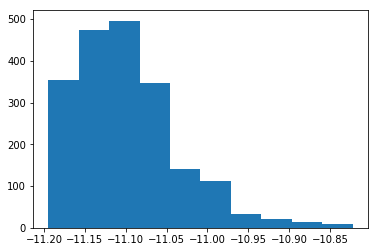

In [167]:
# hist, bins = np.histogram(energies)
# # hist, bins, hist.shape, bins.shape
# plt.bar(0.5*(bins[:-1] + bins[1:]), hist)
hist, bins, ax = plt.hist(energies)
plt.show()

In [176]:
filter = {
    'info.config_type': 'slice_sample',
    'info.energy': {'$gt': -11.},
    'info.pbc': [True, True, True]
}
abcd.db.atoms.count_documents(filter)


156

In [196]:
energies = [val['info']['energy'] for val in abcd.db.atoms.find(filter, {'info.energy':True, '_id':False})]


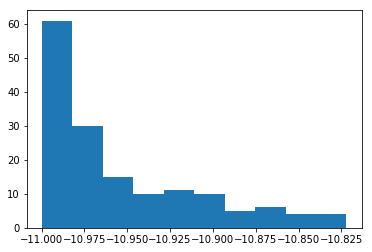

In [178]:
hist, bins, ax = plt.hist(energies)
plt.show()

In [179]:
list(abcd.db.atoms.aggregate(
    [
        {'$match': filter},
        {'$unwind': '$derived.arrays_keys'}, 
        {'$group': {'_id': '$derived.arrays_keys', 'count': {'$sum': 1}}}
    ]
))

[{'_id': 'forces', 'count': 156},
 {'_id': 'positions', 'count': 156},
 {'_id': 'numbers', 'count': 156}]

In [182]:
from abcd_server.formats.dictionary import DictDecoder

In [184]:
with DictDecoder() as decoder:
    traj = [decoder.decode(atoms) for atoms in abcd.db.atoms.find(filter)]

In [185]:
traj

[Atoms(symbols='W', pbc=True, cell=[[3.078389277843499, 0.0, 0.0], [0.3006945132323558, 3.230665029608677, 0.0], [1.681840409942893, 1.706757841868072, 1.743944114741169]], forces=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='W', pbc=True, cell=[[3.001706571918815, 0.0, 0.0], [0.3006945132323558, 3.230665029608677, 0.0], [1.681840409942893, 1.706757841868072, 1.743944114741169]], forces=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='W', pbc=True, cell=[[3.001706571918815, 0.0, 0.0], [0.07199413556243398, 3.230665029608677, 0.0], [1.681840409942893, 1.706757841868072, 1.743944114741169]], forces=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='W', pbc=True, cell=[[3.001706571918815, 0.0, 0.0], [0.07199413556243398, 3.125835011509266, 0.0], [1.681840409942893, 1.706757841868072, 1.743944114741169]], forces=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='W', pbc=True, cell=[[3.001706571918815, 0.0, 0.0], [0.07199413556243398, 3.1258350

In [181]:
traj

[{'_id': ObjectId('5c5a654be7a0b12f3564b4ea'),
  'arrays': {'numbers': [74],
   'positions': [[0.0, 0.0, 0.0]],
   'forces': [[0.0, 0.0, 0.0]]},
  'info': {'cell': [[3.078389277843499, 0.0, 0.0],
    [0.3006945132323558, 3.230665029608677, 0.0],
    [1.681840409942893, 1.706757841868072, 1.743944114741169]],
   'pbc': [True, True, True],
   'constraints': [],
   'config_type': 'slice_sample',
   'energy': -10.95008345730503,
   'virial': [[-0.5302121768029835, -0.8776857520272425, 0.2950366536729647],
    [-0.8776857520272425, -1.747195206333019, -0.7005089930926873],
    [0.2950366536729647, -0.7005089930926873, -3.077344595896728]],
   'calculator_name': 'SinglePointCalculator',
   'calculator_parameters': {}},
  'derived': {'elements': {'W': 1},
   'arrays_keys': ['numbers', 'positions', 'forces'],
   'info_keys': ['cell',
    'pbc',
    'constraints',
    'config_type',
    'energy',
    'virial',
    'calculator_name',
    'calculator_parameters']}},
 {'_id': ObjectId('5c5a654be7a

## Query data from the database

The key component is the query string which implementation is based on the GraphQl specification

- query all
- query atoms
- query properties

- histograms/summaries?

In [175]:
query = {
    'elements': ['Fe', 'H'],
}

with abcd as db:
    traj = [atoms for atoms in db.pull(query)]
    
print(traj)

NotImplementedError: 

Query specific properties (like all energies of filetered atoms):

In [222]:
abcd.db.atoms.count_documents({'arrays.numbers':{'$all': [26, 74]}})

0

In [223]:
abcd.db.atoms.count_documents({'arrays.numbers':{'$in': [26, 74]}})

6028

In [ ]:
query = {
    'filter': { 
        elements: ['Fe', 'H'],
    },
    'fields': [
        'energy',
    ]
}

with abcd as db:
    data = db.query(query)
    
print(data)

## Download the whole database

Download the whole database 

In [ ]:
with open('dump.db') as file:
    with abcd as db:
        db.download(file)

## Linking databases

Pull the data from one into another. This function is usefull when you want to build a local database by fetching the data from another repositories.

In [ ]:
with abcd as db:
    db.fetch_from(url='...', query = {})

In [ ]:
print(abcd.info())

## Command line interface

In [ ]:
!abcd --help

In [ ]:
!abcd connect/login 

In [ ]:
!abcd info

In [ ]:
!abcd push --help

In [ ]:
!abcd pull --help

In [ ]:
!abcd query --help

In [ ]:
!abcd download --help

In [ ]:
# search? it is a specific query which returns with the ids only.

# Web interface

flask web server
